# DS288-2024 Numerical Methods 
## Homework-1

Naman Pesricha Mtech CDS 06-18-01-10-51-24-1-24115

-------------------

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.set_option('display.float_format', lambda x: f'{x:.10e}')

### Loading the dataset

In [91]:
data = pd.read_csv('./data.csv')
data = data.set_index('n')
computed_forward = data.copy(deep=True)
computed_forward.loc[:,:] = 0
computed_backward = computed_forward.copy(deep=True)
data

,Jn(1),Jn(5),Jn(50)
n,,,
0,7.6519768656e-01,-1.7759677131e-01,5.5812327669e-02
1,4.4005058574e-01,-3.2757913759e-01,-9.7511828125e-02
2,1.1490348493e-01,4.6565116278e-02,-5.9712800794e-02
3,1.9563353983e-02,3.6483123061e-01,9.2734804062e-02
4,2.4766389641e-03,3.9123236046e-01,7.0840977282e-02
5,2.4975773021e-04,2.6114054612e-01,-8.1400247697e-02
6,2.0938338002e-05,1.3104873178e-01,-8.7121026821e-02
7,1.5023258174e-06,5.3376410156e-02,6.0491201260e-02
8,9.4223441726e-08,1.8405216655e-02,1.0405856317e-01


## Q1

### Forward Computation
- Set the first two rows with five digits and compute forward
- Iterative scheme rearranged for forward computation: 
    $J_n(x) = \frac{2(n-1)}{x}J_{n-1}(x) - J_{n-2}(x)$

In [92]:
computed_forward.iloc[:2, :] = [[7.6519e-01,-1.7759e-01,5.5812e-02],
                                  [4.4005e-01,-3.2757e-01,-9.7511e-02]]

for i in range(2,11):
    computed_forward.loc[i,'Jn(1)'] = computed_forward.loc[i-1,'Jn(1)']*2*(i-1)/1 - computed_forward.loc[i-2,'Jn(1)']
    computed_forward.loc[i,'Jn(5)'] = computed_forward.loc[i-1,'Jn(5)']*2*(i-1)/5 - computed_forward.loc[i-2,'Jn(5)']
    computed_forward.loc[i,'Jn(50)'] = computed_forward.loc[i-1,'Jn(50)']*2*(i-1)/50 - computed_forward.loc[i-2,'Jn(50)']

computed_forward
absolute_error_computed_forward = abs(computed_forward-data)
relative_error_computed_forward = absolute_error_computed_forward/data
print('Results for forward computation for J10(x):')
print(computed_forward.loc[10])
print('\nAbsolute error in forward computation for J10(x):')
print(absolute_error_computed_forward.loc[10])
print('\nRelative error in forward computaion for J10(x)')
print(relative_error_computed_forward.loc[10])

Results for forward computation for J10(x):
Jn(1)     5.6055331000e+02
Jn(5)     1.5852559616e-03
Jn(50)   -1.1384696301e-01
Name: 10, dtype: float64

Absolute error in forward computation for J10(x):
Jn(1)    5.6055331000e+02
Jn(5)    1.1745331430e-04
Jn(50)   8.8613829735e-07
Name: 10, dtype: float64

Relative error in forward computaion for J10(x)
Jn(1)     2.1308830203e+12
Jn(5)     8.0019827270e-02
Jn(50)   -7.7835313005e-06
Name: 10, dtype: float64


From the above data we can see that the relative error values for $J_{10}(1)$ is  in the order of $10^{12}$ (Very High) and for $J_{10}(5)$ and $J_{10}(50)$ is relatively low ($10^{-2}$ and $10^{-6}$ respectively) 

### Plotting the absolute errors for forward computation.

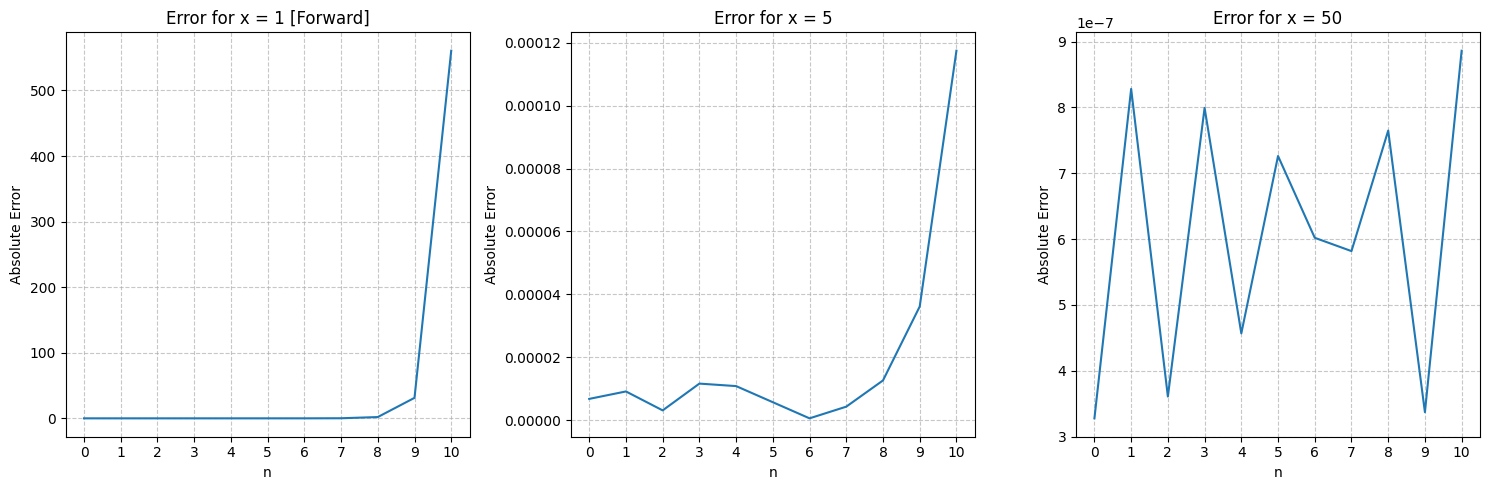

In [93]:
plt.figure(figsize=(15, 5))
custom_xticks = range(0, 11, 1)

# Plot for x = 1
plt.subplot(1, 3, 1)
sns.lineplot(data=absolute_error_computed_forward, x='n', y='Jn(1)')
plt.title('Error for x = 1 [Forward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)

# Plot for x = 5
plt.subplot(1, 3, 2)
sns.lineplot(data=absolute_error_computed_forward, x='n', y='Jn(5)')
plt.title('Error for x = 5')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)

# Plot for x = 50
plt.subplot(1, 3, 3)
sns.lineplot(data=absolute_error_computed_forward, x='n', y='Jn(50)')
plt.title('Error for x = 50')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.xticks(ticks=custom_xticks)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

-------

## Q2

### Backward Computation
- Set the last two rows with five digits and compute backward.
- Iterative scheme rearranged for backeard computation: 
    $J_{n}(x) = \frac{2(n-1)}{x}J_{n+1}(x) - J_{n+2}(x)$

In [98]:
computed_backward.iloc[-2:, :] = [[5.2492e-09,5.5202e-03,-2.7192e-02],
                                  [2.6306e-10,1.4678e-03,-1.1384e-01]]

for i in range(8,-1,-1):
    computed_backward.loc[i,'Jn(1)'] = computed_backward.loc[i+1,'Jn(1)']*2*(i+1)/1 - computed_backward.loc[i+2,'Jn(1)']
    computed_backward.loc[i,'Jn(5)'] = computed_backward.loc[i+1,'Jn(5)']*2*(i+1)/5 - computed_backward.loc[i+2,'Jn(5)']
    computed_backward.loc[i,'Jn(50)'] = computed_backward.loc[i+1,'Jn(50)']*2*(i+1)/50 - computed_backward.loc[i+2,'Jn(50)']

computed_backward
absolute_error_computed_backward = abs(computed_backward-data)
relative_error_computed_backward = absolute_error_computed_backward/data
print('Results for backward computation for J0(x):')
print(computed_backward.loc[0])
print('\nAbsolute error in backward computation for J0(x):')
print(absolute_error_computed_backward.loc[0])
print('\nRelative error in backward computaion for J0(x)')
print(relative_error_computed_backward.loc[0])

Results for backward computation for J0(x):
Jn(1)     7.6519036352e-01
Jn(5)    -1.7759388559e-01
Jn(50)    5.5807275575e-02
Name: 0, dtype: float64

Absolute error in backward computation for J0(x):
Jn(1)    7.3230350601e-06
Jn(5)    2.8857199839e-06
Jn(50)   5.0520941498e-06
Name: 0, dtype: float64

Relative error in backward computaion for J0(x)
Jn(1)     9.5701217983e-06
Jn(5)    -1.6248718727e-05
Jn(50)    9.0519323611e-05
Name: 0, dtype: float64


### Plotting absolute error for backward compuation

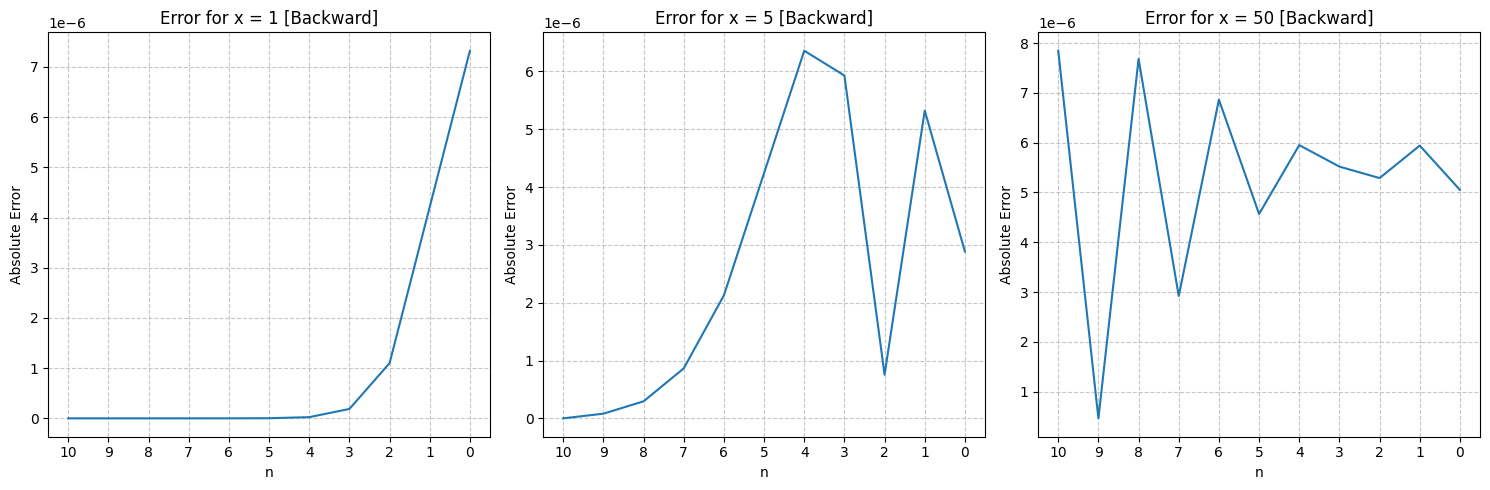

In [103]:
plt.figure(figsize=(15, 5))
custom_xticks = range(0, 11, 1)

# Plot for x = 1
plt.subplot(1, 3, 1)
sns.lineplot(data=absolute_error_computed_backward, x='n', y='Jn(1)')
plt.title('Error for x = 1 [Backward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)
plt.gca().invert_xaxis()

# Plot for x = 5
plt.subplot(1, 3, 2)
sns.lineplot(data=absolute_error_computed_backward, x='n', y='Jn(5)')
plt.title('Error for x = 5 [Backward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=custom_xticks)
plt.gca().invert_xaxis()

# Plot for x = 50
plt.subplot(1, 3, 3)
sns.lineplot(data=absolute_error_computed_backward, x='n', y='Jn(50)')
plt.title('Error for x = 50 [Backward]')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.xticks(ticks=custom_xticks)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

### Q3